<a href="https://colab.research.google.com/github/yxrellx/practicaredNeuronal/blob/main/IA_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Construcción de Representación de ***Conocimiento***

Red **sematica**

La clave 'color_favorito' no existe para Laura


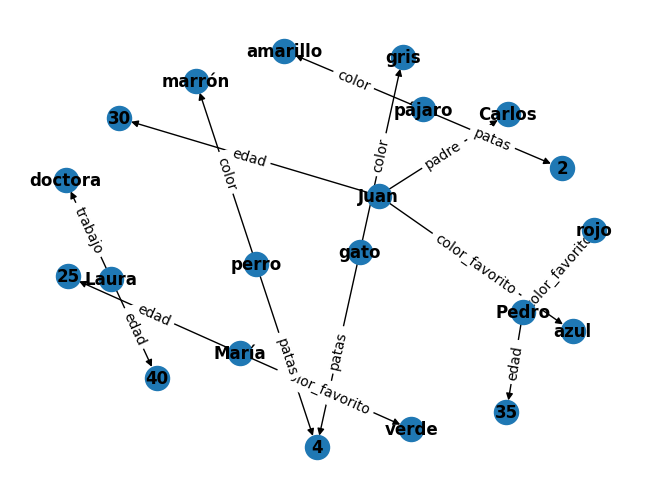

In [31]:
import json
import networkx as nx  #grafos
import matplotlib.pyplot as plt #graficar

# Cargar el JSON conviertiendose archivo python
with open('/content/datos.json', 'r') as f:
    data = json.load(f)

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos y aristas
for persona in data['personas']:
    G.add_node(persona['nombre'])
    G.add_edge(persona['nombre'], persona['edad'], label='edad')
    if 'padre' in persona:
        G.add_edge(persona['nombre'], persona['padre'], label='padre')

       # Manejo de errores para color_favorito
    try:
        G.add_edge(persona['nombre'], str(persona['color_favorito']), label='color_favorito') #convierte el valor de "si están ausentes o tienen tipos inesperados.

        print(f"Error de tipo en color_favorito para {persona['nombre']}")
    except KeyError:
        print(f"La clave 'color_favorito' no existe para {persona['nombre']}")


    if 'trabajo' in persona:
        G.add_edge(persona['nombre'], persona['trabajo'], label='trabajo')

#Se agregan nodos y aristas para atributos como patas y color.
for animal in data['animales']:
    G.add_node(animal['nombre'])
    G.add_edge(animal['nombre'], animal['patas'], label='patas')
    G.add_edge(animal['nombre'], animal['color'], label='color')

# Dibujar el grafo
pos = nx.spring_layout(G) # disposición de los nodos
nx.draw(G, pos, with_labels=True, font_weight='bold') # dibuja el grafo
edge_labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels) #agrega etiquetas a las aristas.

#salida
plt.show()#muestra el grafo con nodos y conexiones


**FRAMES**

In [15]:
# Definición de la clase Frame
class Frame:
    def __init__(self, name): #para inicializar el nombre y un diccionario vacío de atributos.
        self.name = name
        self.attributes = {}

    def add_attribute(self, key, value):
        self.attributes[key] = value

# Crear los frames para las personas
personas_frames = []
for persona in data['personas']:
    frame = Frame(persona['nombre'])
    frame.add_attribute("edad", persona['edad'])

    # Verificar si el atributo padre existe antes de agregarlo
    if 'padre' in persona:
        frame.add_attribute("padre", persona['padre'])

    # Verificar si el atributo trabajo existe antes de agregarlo
    if 'trabajo' in persona:
        frame.add_attribute("trabajo", persona['trabajo'])

    # Verificar si el atributo color_favorito existe antes de agregarlo
    if 'color_favorito' in persona:
        frame.add_attribute("color_favorito", persona['color_favorito'])

    personas_frames.append(frame)

# Crear los frames para los animales
animales_frames = []
for animal in data['animales']:
    frame = Frame(animal['nombre'])
    frame.add_attribute("patas", animal['patas'])
    frame.add_attribute("color", animal['color'])
    animales_frames.append(frame)

# Mostrar los datos estructurados de los frames
for persona in personas_frames:
    print(f"Nombre: {persona.name}, Atributos: {persona.attributes}")

for animal in animales_frames:
    print(f"Nombre: {animal.name}, Atributos: {animal.attributes}")

Nombre: Juan, Atributos: {'edad': 30, 'padre': 'Carlos', 'color_favorito': 'azul'}
Nombre: María, Atributos: {'edad': 25, 'color_favorito': 'verde'}
Nombre: Pedro, Atributos: {'edad': 35, 'color_favorito': 'rojo'}
Nombre: Laura, Atributos: {'edad': 40, 'trabajo': 'doctora'}
Nombre: perro, Atributos: {'patas': 4, 'color': 'marrón'}
Nombre: gato, Atributos: {'patas': 4, 'color': 'gris'}
Nombre: pájaro, Atributos: {'patas': 2, 'color': 'amarillo'}


**PREGUNTAS**

In [16]:
import json
import pandas as pd

In [17]:
# Suponiendo que el archivo JSON ya está cargado
with open('/content/datos.json', 'r') as file:
    data = json.load(file)

In [18]:
# Función para Buscar a una persona por su nombre en los datos JSON y devuelve el valor del atributo solicitado.
def obtener_atributo_persona(nombre, atributo):
    for persona in data['personas']:
        if persona['nombre'] == nombre:
            return persona.get(atributo, 'Atributo no encontrado')   #Si la persona existe, pero el atributo no está definido, devuelve
    return 'Persona no encontrada'  #Si la persona no existe, devuelve

In [19]:
# Función para encontrar animales con un número específico de patas
def obtener_animales_por_patas(patas):
    animales_con_patas = []
    for animal in data['animales']:
        if animal['patas'] == patas:  #Filtra y devuelve una lista con los nombres de los animales que tienen el número de patas especificado.
            animales_con_patas.append(animal['nombre'])
    return animales_con_patas if animales_con_patas else 'No hay animales con ese número de patas'   #Si no hay animales con ese número de patas, devuelve


In [20]:
# 1. ¿Cuál es el nombre del padre de Juan?
padre_de_juan = obtener_atributo_persona('Juan', 'padre')

# 2. ¿Cuál es el color favorito de María?
color_favorito_maria = obtener_atributo_persona('María', 'color_favorito')

# 3. ¿Cuál es la edad de Pedro?
edad_de_pedro = obtener_atributo_persona('Pedro', 'edad')

# 4. ¿Cuál es el nombre del animal que tiene cuatro patas?
animales_con_cuatro_patas = obtener_animales_por_patas(4)

# 5. ¿Cuál es el trabajo de Laura?
trabajo_de_laura = obtener_atributo_persona('Laura', 'trabajo')

In [21]:
# Mostrar resultados
print(f"1. El nombre del padre de Juan es: {padre_de_juan}")
print(f"2. El color favorito de María es: {color_favorito_maria}")
print(f"3. La edad de Pedro es: {edad_de_pedro}")
print(f"4. Los animales que tienen cuatro patas son: {', '.join(animales_con_cuatro_patas) if isinstance(animales_con_cuatro_patas, list) else animales_con_cuatro_patas}")
print(f"5. El trabajo de Laura es: {trabajo_de_laura}")

1. El nombre del padre de Juan es: Carlos
2. El color favorito de María es: verde
3. La edad de Pedro es: 35
4. Los animales que tienen cuatro patas son: perro, gato
5. El trabajo de Laura es: doctora
